In [1]:
# import the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import PolynomialFeatures



In C:\Users\Abhineet\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Abhineet\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Abhineet\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\Abhineet\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Abhineet\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_c

### Load the dataset

- Load the train data and using all your knowledge of pandas try to explore the different statistical properties of the dataset.

In [2]:
# read the dataset and extract the features and target separately

train_data=pd.read_csv('train.csv')
test_data= pd.read_csv('test.csv')

x_train=train_data[['Id','Age', 'Overall', 'Potential', 'Wage (M)']]
y_train=train_data['Value (M)']
x_test = test_data[['Id','Age', 'Overall', 'Potential', 'Wage (M)']]
np.mean(y_train)
np.mean(x_train['Age'])
np.median(y_train)
np.mean(x_train['Wage (M)'])
test_data
x_test

,Id,Age,Overall,Potential,Wage (M)
0,280,28,82,82,0.046
1,569,23,79,85,0.105
2,8731,22,67,74,0.007
3,10085,27,65,65,0.002
4,9831,27,66,67,0.001
...,...,...,...,...,...
3592,5584,33,70,70,0.006
3593,4629,30,71,71,0.026
3594,6123,31,69,69,0.007
3595,664,31,79,79,0.069


### Visualize the data

- Check for the categorical & continuous features. 
- Check out the best plots for plotting between categorical target and continuous features and try making some inferences from these plots.
- Check for the correlation between the features

,Id,Age,Overall,Potential,Value (M),Wage (M)
Id,1.000000,-0.463232,-0.975595,-0.653503,-0.548213,-0.519570
Age,-0.463232,1.000000,0.459678,-0.224055,0.082716,0.149757
Overall,-0.975595,0.459678,1.000000,0.678228,0.635618,0.589736
Potential,-0.653503,-0.224055,0.678228,1.000000,0.595095,0.512910
Value (M),-0.548213,0.082716,0.635618,0.595095,1.000000,0.845124
Wage (M),-0.519570,0.149757,0.589736,0.512910,0.845124,1.000000


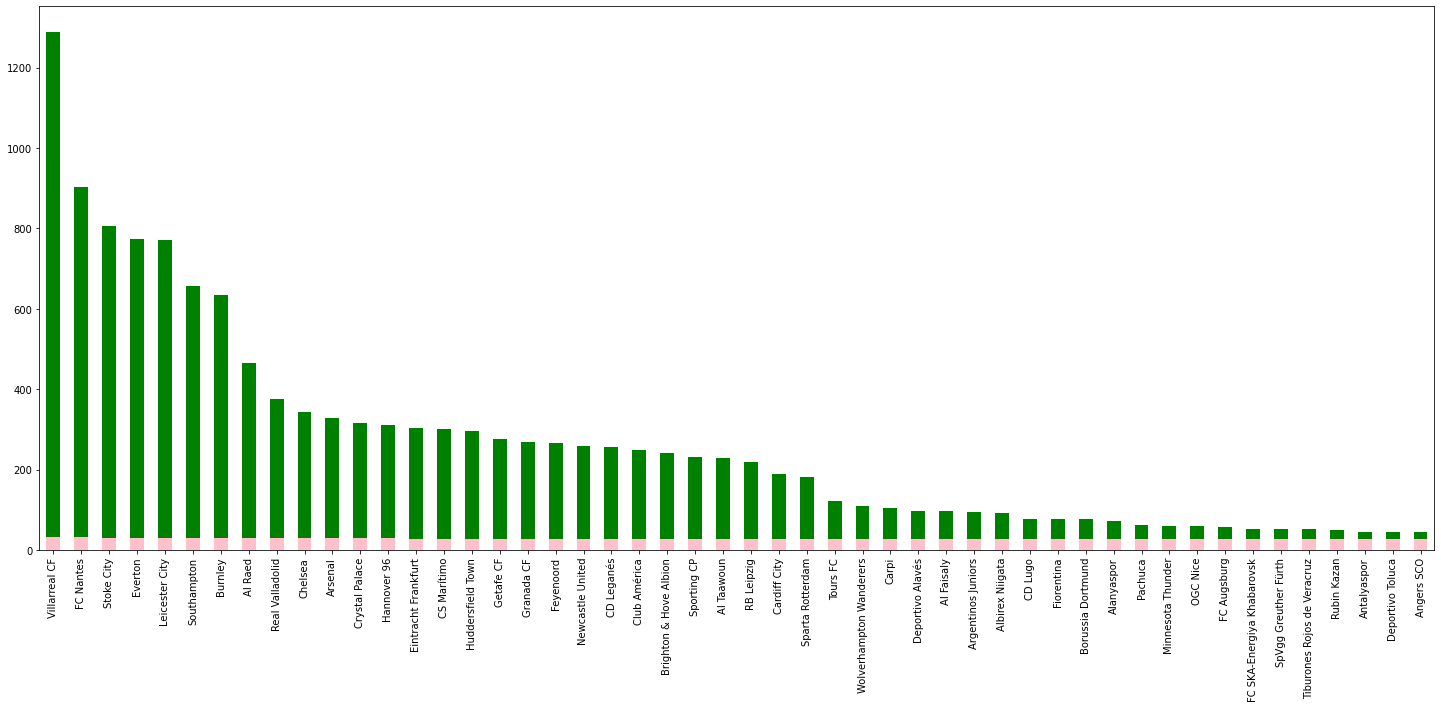

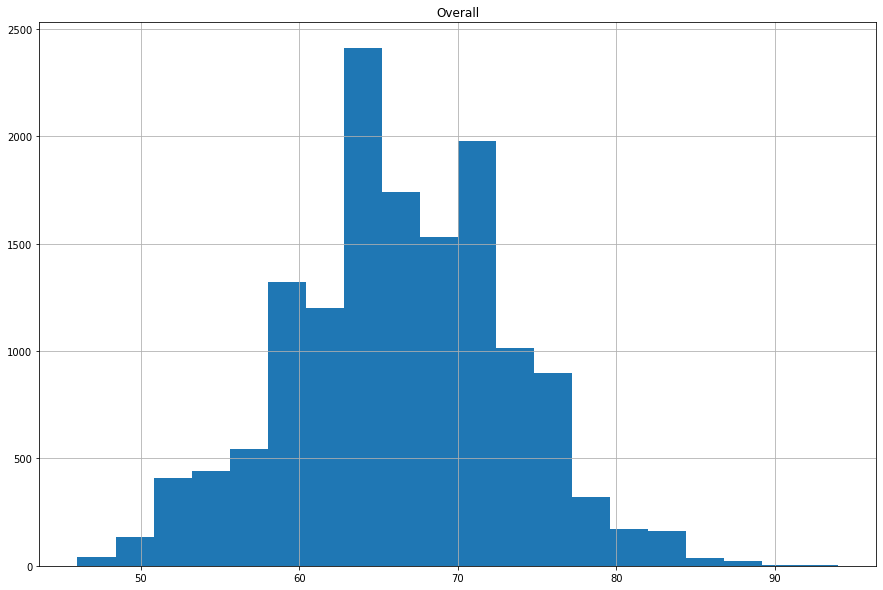

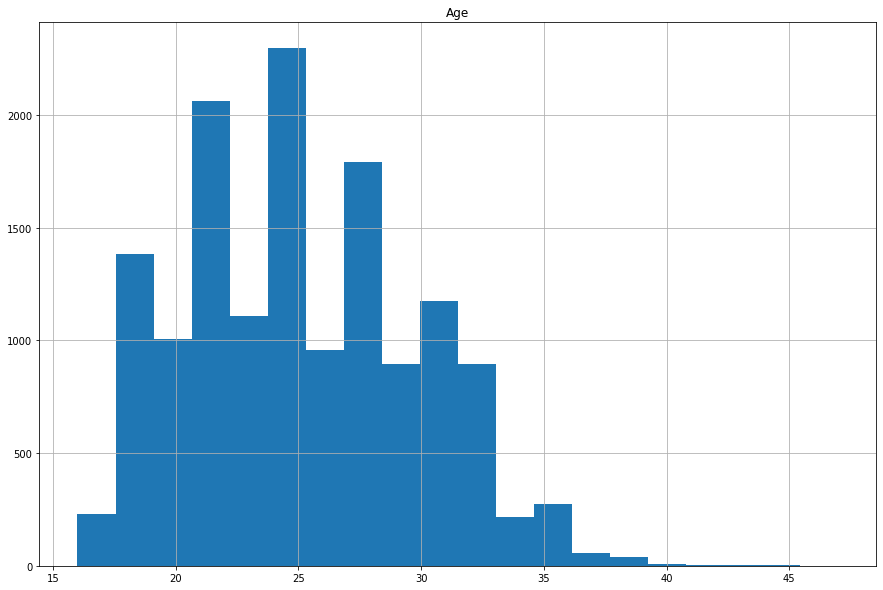

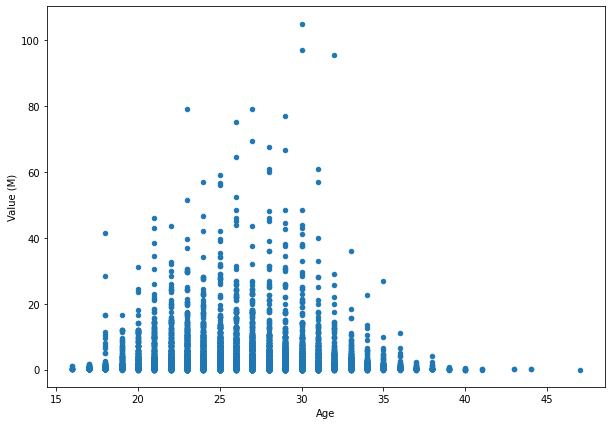

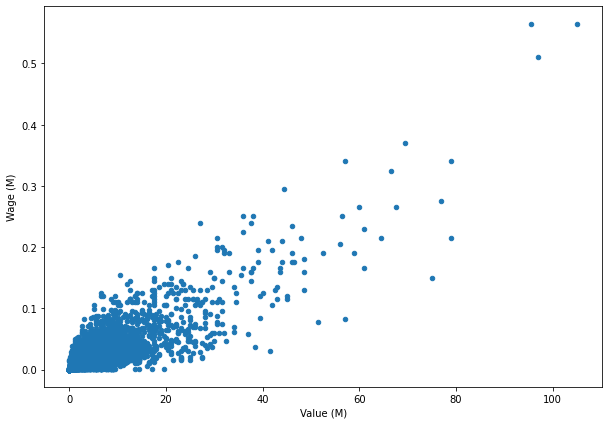

In [3]:
# Code Starts here

national= train_data.Nationality.value_counts()
national.plot.bar(figsize=(25,10), color='green')

clubs= train_data.Club.value_counts()[:50]
clubs.plot.bar(figsize=(25,10), color='pink')


train_data.hist('Overall', figsize=(15,10), bins=20)
train_data.hist('Age', figsize=(15,10), bins=20)

train_data.plot.scatter(x='Age', y='Value (M)',figsize=(10,7))
train_data.plot.scatter(x='Value (M)', y='Wage (M)',figsize=(10,7))
train_data.corr(method='pearson') #learnt from screenshot
# Code ends here

### Model building

- Separate the features and target and then split the train data into train and validation set.
- Now let's come to the actual task, using linear regression, predict the `Value (M)`. 
- Try improving upon the `r2_score` (R-Square) using different parameters that give the best score. You can use higher degree [Polynomial Features of sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) to improve the model prediction. 



In [5]:
# Code Starts here

polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x_train)

linearg = LinearRegression()
linearg.fit(x_poly, y_train)

x_testp=polynomial_features.fit_transform(x_test)
pred= linearg.predict(x_testp)

# # y_pred=pred.tolist()
pred




# Code ends here

array([19.23249617, 18.3505329 ,  1.61851372, ...,  0.85277046,
        9.57995264,  4.237573  ])

### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [66]:
# Code Starts here

output = pd.DataFrame({'Id': x_test.Id, 'Value (M)': pred})
output.to_csv('FIFA.csv', index=False)
output





# Code ends here

,Id,Value (M)
0,280,19.232496
1,569,18.350533
2,8731,1.618514
3,10085,0.129571
4,9831,0.722628
...,...,...
3592,5584,0.979224
3593,4629,1.515836
3594,6123,0.852770
3595,664,9.579953
